In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from pathlib import Path as Path

udemy_data = pd.read_csv('udemy_courses.csv')
udemy_data.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


In [ ]:
udemy_data.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [ ]:
udemy_data.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [ ]:
udemy_data.drop(columns = ['url'],inplace= True )
udemy_data.tail(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3675,635248,Learn and Build using Polymer,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development


In [ ]:
udemy_data = udemy_data.rename({'is_paid' : 'free'}, axis = 1)
udemy_data['free'] = (udemy_data['free']).astype(str)
udemy_data['free'].unique()
udemy_data['free'] = udemy_data['free'].str.replace('True','no')
udemy_data['free'] = udemy_data['free'].str.replace('False','yes')


In [ ]:
udemy_data['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [ ]:
udemy_data['level'] = udemy_data['level'].str.replace('All Levels','All')
udemy_data['level'] = udemy_data['level'].str.replace('Intermediate Level','Intermediate')
udemy_data['level'] = udemy_data['level'].str.replace('Beginner Level','Beginner')
udemy_data['level'] = udemy_data['level'].str.replace('Expert Level','Expert')
udemy_data['level'].unique()

array(['All', 'Intermediate', 'Beginner', 'Expert'], dtype=object)

In [ ]:
udemy_data['published_timestamp'] = pd.to_datetime(udemy_data['published_timestamp'])
udemy_data.tail(3)

,course_id,course_title,free,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3675,635248,Learn and Build using Polymer,no,40,513,169,48,All,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,no,50,300,31,38,All,3.0,2016-08-11 19:06:15+00:00,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,no,45,901,36,20,Beginner,2.0,2014-09-28 19:51:11+00:00,Web Development


In [ ]:
udemy_data['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [ ]:
udemy_data_csv = udemy_data.to_csv("udemy_course.csv")

In [ ]:
Path('udemy_data.db').touch()
udemy_conn = sqlite3.connect('udemy_data.db')
udemy_cursor = udemy_conn.cursor()

udemy_data_deep = udemy_data.copy()

In [ ]:
udemy_data.to_sql('udemy_data_deep', udemy_conn, if_exists='replace', index=False)

In [ ]:
udemy_data_init_query = pd.read_sql('''SELECT *
                                         from udemy_data_deep''',udemy_conn)

[Text(0.5, 1.0, 'Number of courses offered based on subject')]

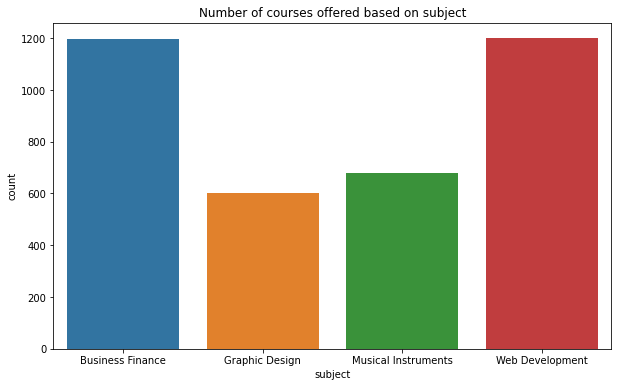

In [ ]:
fig,axes = plt.subplots(1,1, figsize = (10,6))
sns.countplot(x =  udemy_data_init_query['subject']).set(title = 'Number of courses offered based on subject')

In [ ]:
sql_query = pd.read_sql(''' SELECT course_title, free,price,level,subject
                              from udemy_data_deep 
                          order by price DESC limit 10 ''',udemy_conn)

In [ ]:
sql_query = pd.read_sql(''' SELECT course_title, free,price,level,subject
                              from udemy_data_deep 
                          order by price DESC limit 10 ''',udemy_conn)
sql_query

,course_title,free,price,level,subject
0,Ultimate Investment Banking Course,no,200,All,Business Finance
1,How To Maximize Your Profits Trading Options,no,200,Intermediate,Business Finance
2,The Only Investment Strategy You Need For Your...,no,200,All,Business Finance
3,Forex Trading Secrets of the Pros With Amazon'...,no,200,All,Business Finance
4,Trading Options With Money Flow,no,200,All,Business Finance
5,Python Algo Trading: Sentiment Trading with News,no,200,All,Business Finance
6,The Complete Chart Pattern Trading Course: A P...,no,200,All,Business Finance
7,Winning Forex Trading with Live Forex Trading ...,no,200,All,Business Finance
8,Forex Traders - Create Your First Trading Robo...,no,200,All,Business Finance
9,Investing 101: The Complete Online Investing C...,no,200,All,Business Finance


[Text(0.5, 1.0, '10 most expensive courses')]

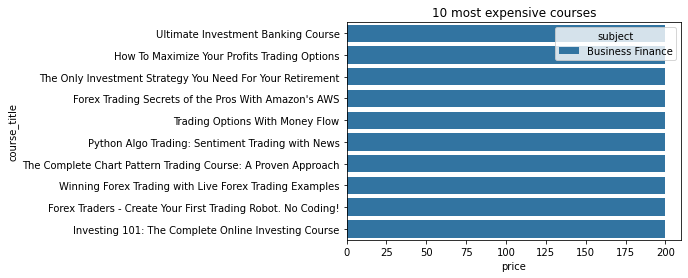

In [ ]:
sns.barplot(data  = sql_query, x = 'price', y = 'course_title', hue = 'subject').set(title = '10 most expensive courses')

In [ ]:
sql_query_2 = pd.read_sql(''' SELECT subject, 
                                     COUNT(*) as course_count,
                                     100 * COUNT(subject) / (SELECT COUNT(*) from udemy_data_deep) as pct,
                                     AVG(price) as average_price,
                                     SUM(content_duration) / COUNT(subject) as average_duration,
                                     MAX(price) as max_price,
                                     MIN(price) as min_price
                                from udemy_data_deep
                            GROUP BY subject ''', udemy_conn)

udemy_data_csv_1 = sql_query_2.to_csv("udemy_data_csv_1.csv")
sql_query_2

,subject,course_count,pct,average_price,average_duration,max_price,min_price
0,Business Finance,1195,32,68.552301,3.552999,200,0
1,Graphic Design,603,16,57.827529,3.580542,200,0
2,Musical Instruments,680,18,49.558824,2.854387,200,0
3,Web Development,1200,32,77.033333,5.594792,200,0


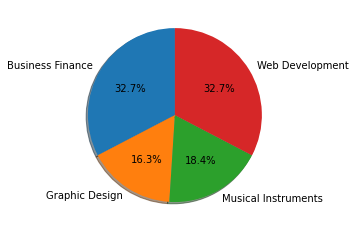

In [ ]:
plt.pie(sql_query_2['pct'], labels=sql_query_2['subject'], autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

[Text(0.5, 1.0, 'Average subject price')]

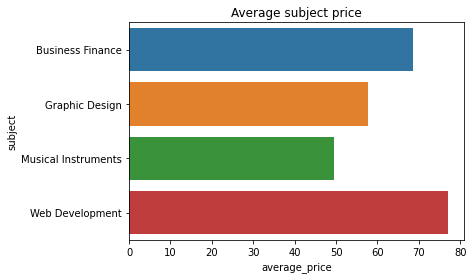

In [ ]:
sns.barplot(data = sql_query_2, x = 'average_price', y = 'subject').set(title = 'Average subject price')

[Text(0.5, 1.0, 'Average duration of courses based on subject')]

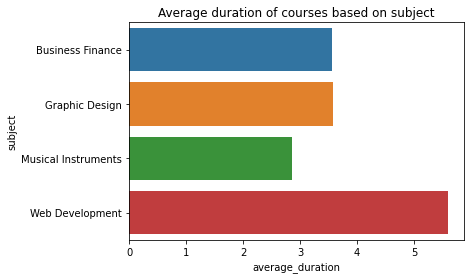

In [ ]:
sns.barplot(data = sql_query_2, x = 'average_duration', y = 'subject' ).set(title = 'Average duration of courses based on subject')


In [ ]:
sql_query_3 = pd.read_sql(''' SELECT subject,
                                     num_subscribers
                                from udemy_data_deep
                               where subject = 'Web Development'          
                            GROUP BY subject''', udemy_conn)


In [ ]:
sql_query_3 = pd.read_sql(''' SELECT subject,
                                     COUNT(*) as count
                                from udemy_data_deep
                               where price >= 200            
                            GROUP BY subject''', udemy_conn)

udemy_data_csv_2 = sql_query_3.to_csv("udemy_data_csv_2.csv")
sql_query_3

,subject,count,SUM(num_subscribers)
0,Business Finance,128,180278
1,Graphic Design,35,188088
2,Musical Instruments,19,148584
3,Web Development,113,819381


[Text(0.5, 1.0, 'subject with Price = 200')]

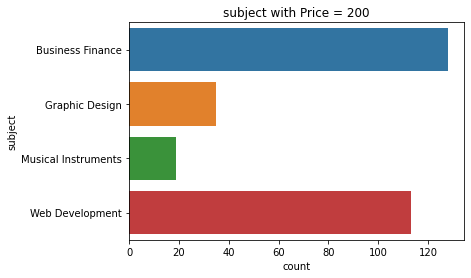

In [ ]:
sns.barplot(data = sql_query_3, x = 'count', y ='subject').set(title = 'subject with Price = 200')


In [ ]:
sql_query = pd.read_sql(''' SELECT SUM(num_subscribers) as sub_count,
                                   subject,
                                   free,\
                                from udemy_data_deep
                                group by subject,free
                               order by sub_count desc ''', udemy_conn)

udemy_data_csv_5 = sql_query.to_csv("udemy_data_csv_5.csv")
sql_query

,sub_count,subject,free
0,5597831,Web Development,no
1,2382741,Web Development,yes
2,1265483,Business Finance,no
3,778327,Graphic Design,no
4,603228,Business Finance,yes
5,541954,Musical Instruments,no
6,304735,Musical Instruments,yes
7,284821,Graphic Design,yes


<AxesSubplot:xlabel='subject', ylabel='sub_count'>

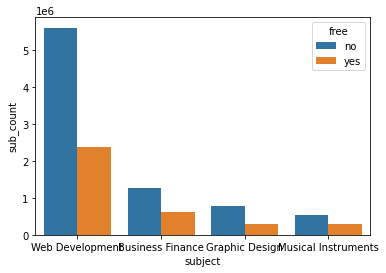

In [ ]:
sns.barplot(data = sql_query, y = 'sub_count',x = 'subject', hue = 'free')

In [ ]:
sql_query_4 = pd.read_sql('''SELECT subject,
                                    COUNT(subject) as free_courses,
                                    COUNT(subject) * 100 / ( SELECT COUNT(*) from udemy_data_deep ) AS pct
                               from udemy_data_deep
                              where free =  'yes' 
                           GROUP BY subject''', udemy_conn)
  

udemy_data_csv_4 = sql_query_4.to_csv("udemy_data_csv_4.csv")
sql_query_4

,subject,free_courses,pct
0,Business Finance,96,2
1,Graphic Design,35,0
2,Musical Instruments,46,1
3,Web Development,133,3


[Text(0.5, 1.0, 'Number of Free Course offered by subject')]

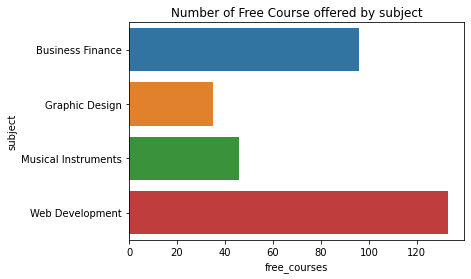

In [ ]:
sns.barplot(data = sql_query_4, x = 'free_courses', y = 'subject').set(title = 'Number of Free Course offered by subject')

In [ ]:
sql = pd.read_sql('''SELECT subject, SUM(num_subscribers), level from udemy_data_deep where free = 'no' group by subject,level  ''',udemy_conn)
sql

,subject,SUM(num_subscribers),level
0,Business Finance,792330,All
1,Business Finance,347901,Beginner
2,Business Finance,30146,Expert
3,Business Finance,95106,Intermediate
4,Graphic Design,490121,All
5,Graphic Design,236692,Beginner
6,Graphic Design,1008,Expert
7,Graphic Design,50506,Intermediate
8,Musical Instruments,306024,All
9,Musical Instruments,174117,Beginner


In [ ]:
sql_query_6 = pd.read_sql('''SELECT subject,
                                    COUNT(*) as count,
                                    num_subscribers,
                                    level
                                from udemy_data_deep
                                where free = 'yes'  
                            GROUP BY subject,level

                                    
                                  ''', udemy_conn)

udemy_data_csv_3 = sql_query_6.to_csv("udemy_data_csv_3.csv")

[Text(0.5, 1.0, 'Free courses  offered based on subject and level')]

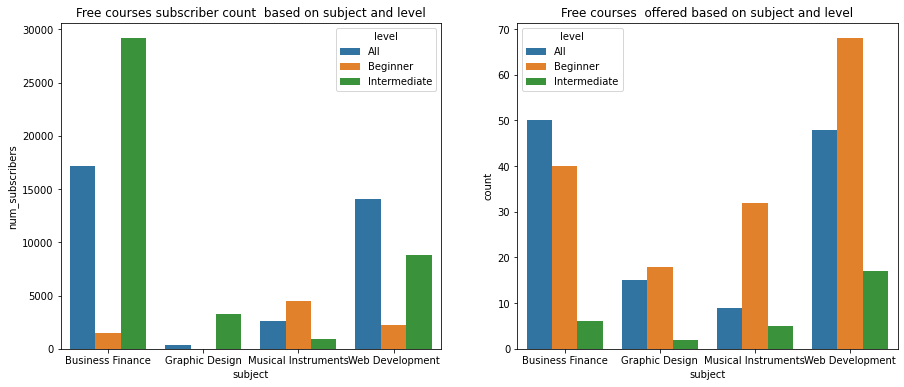

In [ ]:
fig,axes = plt.subplots(1,2,figsize = (15,6))
sns.barplot(data = sql_query_6, x = 'subject', y = 'num_subscribers',hue = 'level',ax = axes[0]).set(title = 'Free courses subscriber count  based on subject and level')
sns.barplot(data = sql_query_6, x = 'subject', y = 'count', hue = 'level',ax = axes[1]).set(title = 'Free courses  offered based on subject and level')

In [ ]:
sql_query_7 = pd.read_sql('''SELECT subject,
                                    COUNT(*) as count,
                                    SUM(num_subscribers) as sub_count,
                                    level
                                from udemy_data_deep 
                                where free = 'no'
                            GROUP BY subject,level
                                    
                                  ''', udemy_conn)



[Text(0.5, 1.0, 'Free courses  offered based on subject and level')]

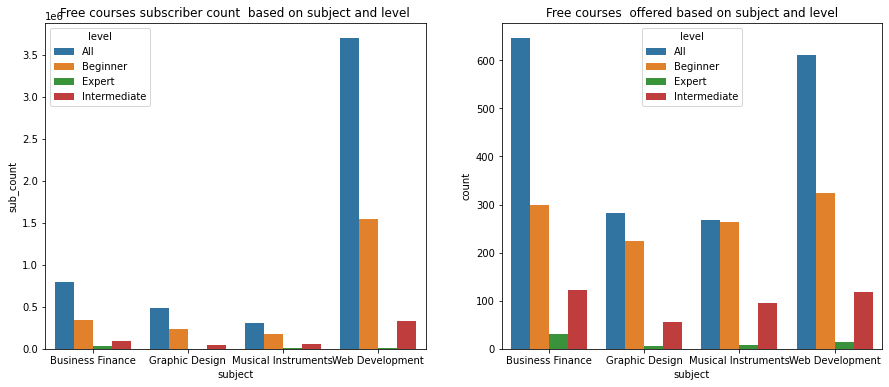

In [ ]:
fig,axes = plt.subplots(1,2,figsize = (15,6))
sns.barplot(data = sql_query_7, x = 'subject', y = 'sub_count',hue = 'level',ax = axes[0]).set(title = 'Free courses subscriber count  based on subject and level')
sns.barplot(data = sql_query_7, x = 'subject', y = 'count', hue = 'level',ax = axes[1]).set(title = 'Free courses  offered based on subject and level')


In [ ]:
sql_query_5 = pd.read_sql('''SELECT num_subscribers,
                                    content_duration,
                                    free,
                                    subject
                               from udemy_data_deep
                         
                              order by content_duration 
                                  ''', udemy_conn)

udemy_data_csv_6 = sql_query_5.to_csv("udemy_data_csv_6.csv")
sql_query_5

,num_subscribers,content_duration,free,subject
0,0,0.000000,no,Business Finance
1,307,0.133333,no,Business Finance
2,605,0.316667,no,Business Finance
3,327,0.450000,no,Business Finance
4,23,0.466667,no,Business Finance
...,...,...,...,...
3673,15500,68.500000,no,Graphic Design
3674,209,70.000000,no,Business Finance
3675,1941,71.500000,no,Business Finance
3676,7501,76.500000,no,Web Development


<AxesSubplot:xlabel='content_duration', ylabel='num_subscribers'>

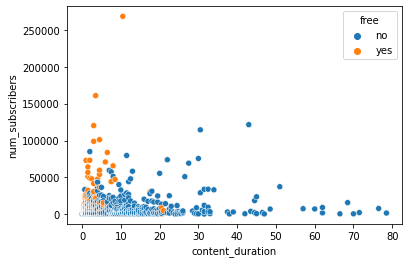

In [ ]:
sns.scatterplot(data = sql_query_5, x = 'content_duration', y = 'num_subscribers', hue = 'free')

Coursera Dataset

In [ ]:
coursera_data = pd.read_csv('coursera.csv')
coursera_data.head(3)

,url,price,course_by,title,skills,ratings,reviews,"level, type and duration"
0,https://www.coursera.org/learn/the-science-of-...,Free,Yale University,The Science of Well-Being,"Personal Development, Business Psychology, Ent...",4.9,(35.5k reviews),Mixed · Course · 1-3 Months
1,https://www.coursera.org/learn/indigenous-canada,Free,University of Alberta,Indigenous Canada,"Leadership and Management, Business Psychology...",4.8,(20.8k reviews),Mixed · Course · 1-3 Months
2,https://www.coursera.org/learn/financial-marke...,Free,Yale University,Financial Markets,"Finance, Banking, Investment Management, Risk ...",4.8,(24.4k reviews),Beginner · Course · 1-3 Months


In [ ]:
coursera_data.isna().sum()

url                           0
price                        32
course_by                     0
title                         0
skills                      182
ratings                      42
reviews                      42
level, type and duration      0
dtype: int64

In [ ]:
coursera_data['skills'] = coursera_data['skills'].fillna('unavailable')
coursera_data['ratings'] = coursera_data['ratings'].fillna(coursera_data['ratings'].mean())
coursera_data.isna().sum()

level = []
typ = []
duration = []

for data in coursera_data['level, type and duration']:
  temp1,temp2,temp3 = data.split(' ·')
  level.append(temp1)
  typ.append(temp2)
  duration.append(temp3)

coursera_data.drop(columns = ['level, type and duration','url','price'],axis = 1, inplace = True)

coursera_data['level'] = level
coursera_data['type'] = typ
coursera_data['duration'] = duration

coursera_data.head(3)

,course_by,title,skills,ratings,reviews,level,type,duration
0,Yale University,The Science of Well-Being,"Personal Development, Business Psychology, Ent...",4.9,(35.5k reviews),Mixed,Course,1-3 Months
1,University of Alberta,Indigenous Canada,"Leadership and Management, Business Psychology...",4.8,(20.8k reviews),Mixed,Course,1-3 Months
2,Yale University,Financial Markets,"Finance, Banking, Investment Management, Risk ...",4.8,(24.4k reviews),Beginner,Course,1-3 Months


In [ ]:
coursera_data['duration'].unique()


array([' 1-3 Months', ' 1-4 Weeks', ' 3-6 Months', ' Less Than 2 Hours'],
      dtype=object)

In [ ]:
Path('coursera_data.db').touch()
coursera_conn = sqlite3.connect('coursera_data.db')
coursera_cursor = coursera_conn.cursor()


In [ ]:
coursera_data.to_sql('coursera_data', coursera_conn, if_exists='replace', index=False)

In [ ]:
sql_query_corsera_1 = pd.read_sql(''' SELECT *
                                        from coursera_data
                                       where  type = ' Course' AND ( skills LIKE '%program%' OR skills LIKE '%web' ) 
                                         ''',coursera_conn) 


sql_query_corsera_1

,course_by,title,skills,ratings,reviews,level,type,duration
0,Yale University,Connected Leadership,"Entrepreneurship, Strategy and Operations, Lea...",4.60000,(24 reviews),Beginner,Course,1-3 Months
1,Infosec,Introduction to Cybersecurity Foundations,"Cloud Computing, Computer Networking, Network ...",4.60000,(105 reviews),Beginner,Course,1-4 Weeks
2,University of Toronto,Learn to Program: The Fundamentals,"Computer Programming, Python Programming, Comp...",4.70000,(6k reviews),Beginner,Course,1-3 Months
3,Pontificia Universidad Católica de Chile,Introducción a la programación en Python I: Ap...,"Computer Programming, Python Programming, Stat...",4.40000,(3.9k reviews),Beginner,Course,1-3 Months
4,Meta,WhatsApp Business Platform for Developers,"Cloud API, Cloud Computing, Cloud Applications...",4.30000,(12 reviews),Intermediate,Course,1-4 Weeks
...,...,...,...,...,...,...,...,...
76,Universiteit Leiden,Population Health: Predictive Analytics,"Data Analysis, R Programming",4.50000,(22 reviews),Intermediate,Course,1-3 Months
77,University of Michigan,Python에서 데이터베이스 사용하기,"Computer Programming, Statistical Programming,...",4.69556,None,Mixed,Course,1-3 Months
78,University of Michigan,Preparing for Graduate Study in the U.S.: A co...,"Communication, Probability & Statistics, Resea...",4.30000,(49 reviews),Intermediate,Course,1-3 Months
79,University of Rochester,Confronting The Big Questions: Highlights of M...,"Computational Thinking, Computer Programming, ...",4.60000,(454 reviews),Mixed,Course,1-4 Weeks


[Text(0.5, 1.0, 'Web Development and Programming course count based on levels')]

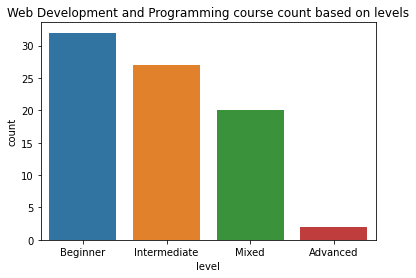

In [ ]:
sns.countplot(x = sql_query_corsera_1['level']).set(title = 'Web Development and Programming course count based on levels')

In [ ]:
sql_query_corsera_2 = pd.read_sql('''SELECT duration,level,COUNT(level) as Count
                                       from coursera_data
                                       where  type = ' Course' AND ( skills LIKE '%program%' OR skills LIKE '%web' ) 
                                    group by duration,level''',coursera_conn)
sql_query_corsera_2                                   

,duration,level,Count
0,1-3 Months,Advanced,2
1,1-3 Months,Beginner,24
2,1-3 Months,Intermediate,20
3,1-3 Months,Mixed,17
4,1-4 Weeks,Beginner,7
5,1-4 Weeks,Intermediate,5
6,1-4 Weeks,Mixed,3
7,3-6 Months,Beginner,1
8,3-6 Months,Intermediate,2


<AxesSubplot:xlabel='level', ylabel='Count'>

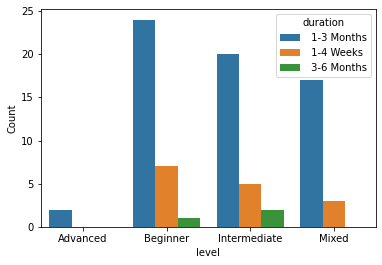

In [ ]:
sns.barplot(data = sql_query_corsera_2, x = 'level', y = 'Count', hue = 'duration')